In [ ]:
from google.colab import userdata
import os
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle datasets download -d harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows
! unzip "imdb-dataset-of-top-1000-movies-and-tv-shows"

Dataset URL: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows
License(s): CC0-1.0
imdb-dataset-of-top-1000-movies-and-tv-shows.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  imdb-dataset-of-top-1000-movies-and-tv-shows.zip
replace imdb_top_1000.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data= pd.read_csv("imdb_top_1000.csv")
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [20]:
data.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross              0
dtype: int64

Data Preprocessing:

In [ ]:
data['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

I think that best option is to fill empty values in 'Certificate' column with value 'Unrated'.
Two other columns for now I will leave with nulls

In [ ]:
data['Certificate']=data['Certificate'].fillna('Unrated')

i think we should change 'Gross' data type to int for more comfortable usage in future

In [ ]:
data['Gross'] = data['Gross'].fillna(0)
data['Gross'] = data['Gross'].astype(str).str.replace(',', '').replace(' ', '')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce').fillna(0).astype(int)

Rating Trends Over Years:

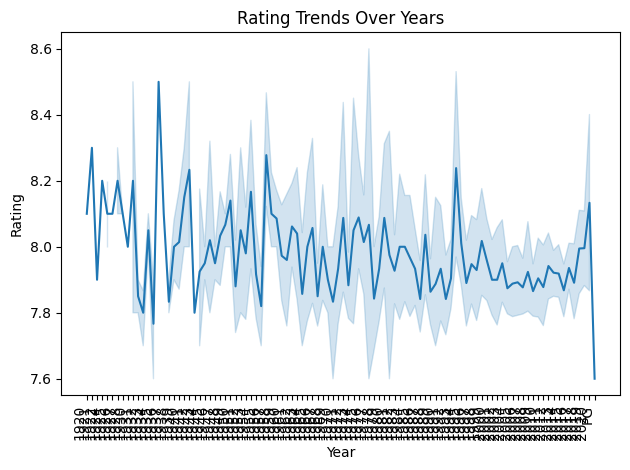

In [ ]:
data_sorted_by_year = data.sort_values(by=['Released_Year'],ascending=True)
sns.lineplot(x=data_sorted_by_year['Released_Year'], y=data_sorted_by_year['IMDB_Rating'], data=data)
plt.title('Rating Trends Over Years')
plt.xlabel('Year')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

Genre Popularity Analysis:

In [ ]:
data_sorted_by_genre = data.sort_values(by=['Genre'],ascending=True)
data_sorted_by_genre['Genre'].unique()

array(['Action, Adventure', 'Action, Adventure, Biography',
       'Action, Adventure, Comedy', 'Action, Adventure, Crime',
       'Action, Adventure, Drama', 'Action, Adventure, Family',
       'Action, Adventure, Fantasy', 'Action, Adventure, History',
       'Action, Adventure, Horror', 'Action, Adventure, Mystery',
       'Action, Adventure, Romance', 'Action, Adventure, Sci-Fi',
       'Action, Adventure, Thriller', 'Action, Adventure, War',
       'Action, Adventure, Western', 'Action, Biography, Crime',
       'Action, Biography, Drama', 'Action, Comedy, Crime',
       'Action, Comedy, Fantasy', 'Action, Comedy, Mystery',
       'Action, Comedy, Romance', 'Action, Crime, Comedy',
       'Action, Crime, Drama', 'Action, Crime, Mystery',
       'Action, Crime, Thriller', 'Action, Drama',
       'Action, Drama, History', 'Action, Drama, Mystery',
       'Action, Drama, Sci-Fi', 'Action, Drama, Sport',
       'Action, Drama, Thriller', 'Action, Drama, War',
       'Action, Drama, We

In [28]:
movies_by_genre = data.groupby('Genre')['Genre'].value_counts()
print(movies_by_genre)

Genre
Action, Adventure                5
Action, Adventure, Biography     1
Action, Adventure, Comedy       10
Action, Adventure, Crime         1
Action, Adventure, Drama        14
                                ..
Mystery, Romance, Thriller       1
Mystery, Sci-Fi, Thriller        2
Mystery, Thriller                9
Thriller                         1
Western                          4
Name: count, Length: 202, dtype: int64


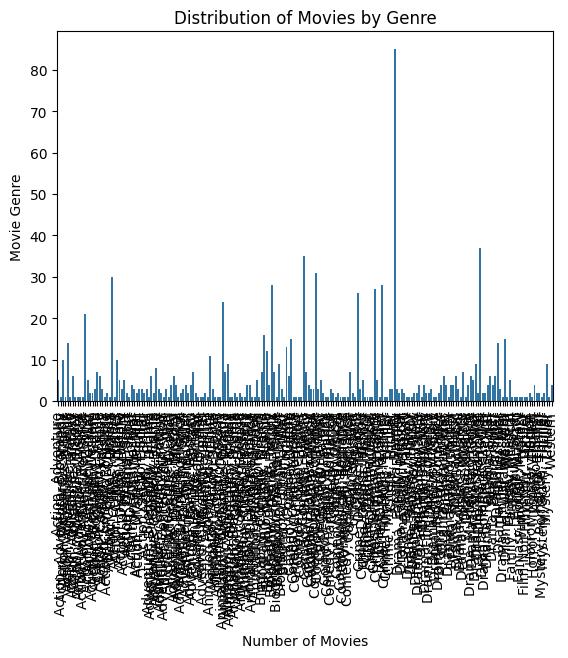

In [39]:
sns.barplot(movies_by_genre)
plt.ylabel("Movie Genre")
plt.xlabel("Number of Movies")
plt.xticks(rotation=90)
plt.title("Distribution of Movies by Genre")
plt.show()

Director’s Impact on Ratings:

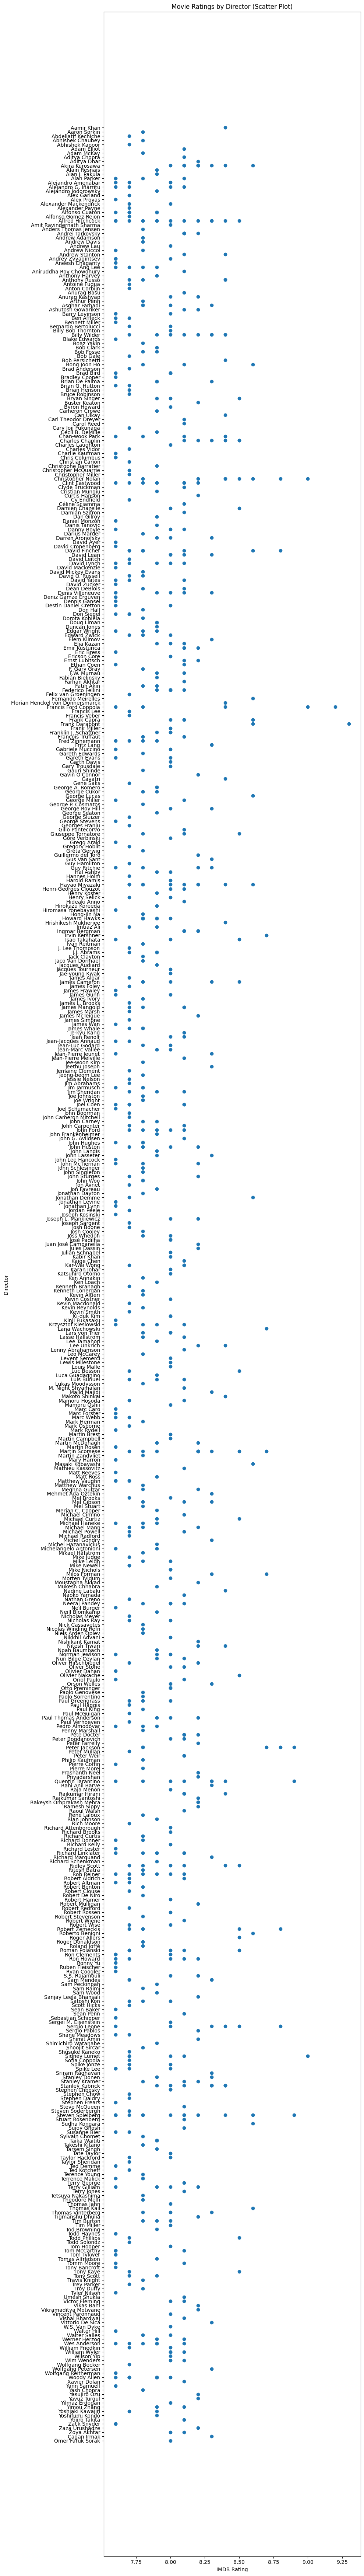

In [ ]:
data_sorted_by_director = data.sort_values(by=['Director'],ascending=False)
plt.figure(figsize=(10, 70))
plt.scatter(data_sorted_by_director['IMDB_Rating'], data_sorted_by_director['Director'])
plt.ylabel('Director')
plt.xlabel('IMDB Rating')
plt.title('Movie Ratings by Director (Scatter Plot)')
plt.tight_layout()
plt.show()

Star Power Analysis:

<Figure size 1000x600 with 0 Axes>

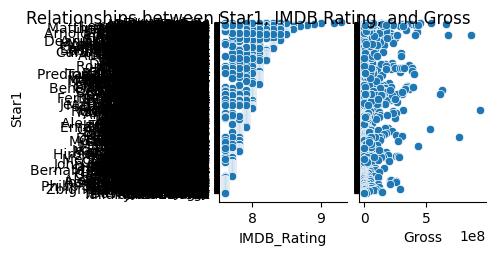

<Figure size 1000x600 with 0 Axes>

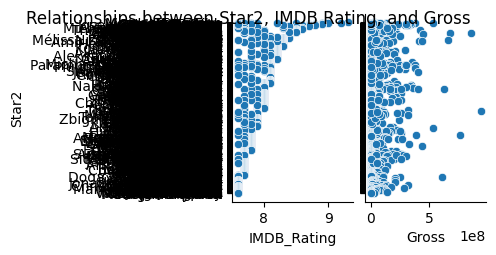

<Figure size 1000x600 with 0 Axes>

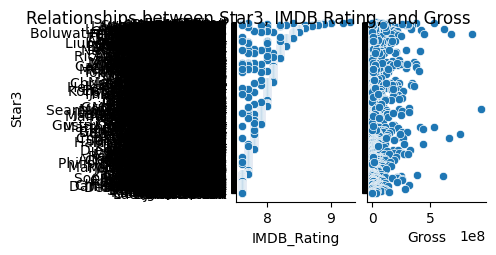

<Figure size 1000x600 with 0 Axes>

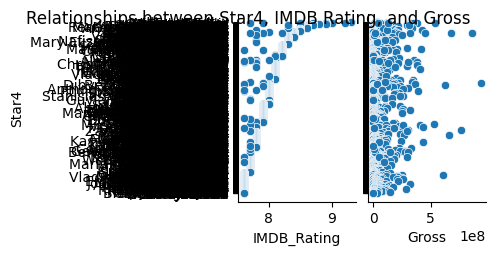

In [19]:
star_cols = ['Star1', 'Star2', 'Star3', 'Star4']
for col in star_cols:
  plt.figure(figsize=(10, 6))
  sns.pairplot(data, x_vars=['IMDB_Rating', 'Gross'], y_vars=[col])
  plt.suptitle(f'Relationships between {col}, IMDB Rating, and Gross')
  plt.show()